In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [3]:
path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"
df= pd.read_csv(path)
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


We can plot each of these features:

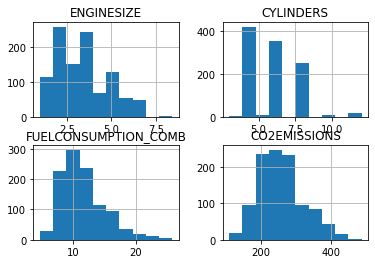

In [5]:
cdf.hist()
plt.show()

Now, let's plot each of these features against the Emission, to see how linear their relationship is:


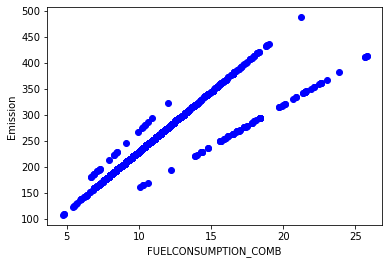

In [6]:
plt.scatter(x=cdf.FUELCONSUMPTION_COMB, y=cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

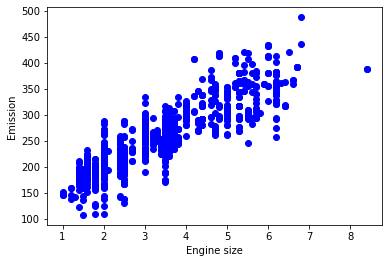

In [7]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

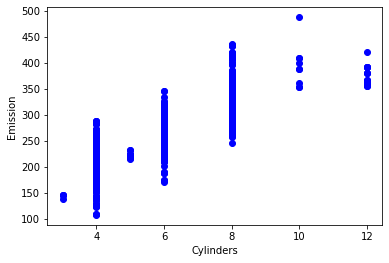

In [8]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

#### Creating train and test dataset
Train/Test Split involves splitting the dataset into training and testing sets that are mutually exclusive. After which, you train with the training set and test with the testing set. 
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the model. Therefore, it gives us a better understanding of how well our model generalizes on new data.

This means that we know the outcome of each data point in the testing dataset, making it great to test with! Since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using __np.random.rand()__ function: 


In [9]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

### Simple Linear Regression Model
Linear Regression fits a linear model with coefficients B = (B1, ..., Bn) to minimize the 'residual sum of squares' between the actual value y in the dataset, and the predicted value yhat using linear approximation. 


In [10]:
x_data = cdf[['ENGINESIZE']]
y_data = cdf[['CO2EMISSIONS']]

In [11]:
x_train, x_test, y_train,y_test =train_test_split(x_data,y_data,test_size=0.2, random_state=1)

In [12]:
print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 214
number of training samples: 853


#### Evaluation
We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set: 
* Mean Absolute Error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.

* Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean Absolute Error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.

* Root Mean Squared Error (RMSE). 

* R-squared is not an error, but rather a popular metric to measure the performance of your regression model. It represents how close the data points are to the fitted regression line. The higher the R-squared value, the better the model fits your data. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).


In [35]:
lm = LinearRegression()

lm.fit(x_train,y_train)
#predicted values of Y
Yhat=lm.predict(x_test)
#R^2 metric
score= lm.score(x_test,y_test)

print(f" The model can predict the variance of values of predicted variable CO2EMISSION with {round(score,2)} success score")

 The model can predict the variance of values of predicted variable CO2EMISSION with 0.76 success score


In [25]:
# Calculate the predicted values for the test set
Yhat = lm.predict(x_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, Yhat)

print("Mean Squared Error:", mse)


Mean Squared Error: 955.3707648173705


In [26]:
# Predicted values for the test set
Yhat = lm.predict(x_test)

# Calculate Residual Sum of Squares (RSS)
rss = np.sum((y_test - Yhat) ** 2)

print("Residual Sum of Squares (RSS):", rss)


Residual Sum of Squares (RSS): CO2EMISSIONS    204449.343671
dtype: float64


In [27]:
print(rss)

CO2EMISSIONS    204449.343671
dtype: float64


In [31]:
# Predicted values for the test set
Yhat = lm.predict(x_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, Yhat)

print("Mean Absolute Error (MAE):", round(mae,2))


Mean Absolute Error (MAE): 23.21
